In [1]:
%matplotlib inline

from glob import glob
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
dfiles = glob('data/*.json')
print(dfiles)

['data/weather_10.json', 'data/weather_08.json', 'data/weather_09.json', 'data/weather_03.json', 'data/weather_06.json', 'data/weather_07.json', 'data/weather_04.json', 'data/weather_05.json']


In [3]:
monthly = []
for fname in sorted(dfiles):
    with open(fname) as fl:
        monthly.append(json.load(fl))
print(len(monthly[0]['data']['weather']))

32


In [4]:
for mdata in monthly:
    print(mdata['data']['weather'][0]['date'], len(mdata['data']['weather']) - 1)

2018-03-01 31
2018-04-01 30
2018-05-01 31
2018-06-01 30
2018-07-01 31
2018-08-01 31
2018-09-01 30
2018-10-01 19


In [5]:
print('Times per day:')
print(len(monthly[0]['data']['weather'][0]['hourly']))

print('Time range:')
print(monthly[0]['data']['weather'][0]['hourly'][0]['time'])
print(monthly[0]['data']['weather'][0]['hourly'][-1]['time'])

Times per day:
24
Time range:
0
2300


In [6]:
daily = []
for mdata in monthly:
    daily += mdata['data']['weather'][:-1]
    
print(daily[0]['date'], daily[-1]['date'])

2018-03-01 2018-10-19


In [25]:
import time
from datetime import datetime, timedelta

lookup = {}
hourly = []
for dind, ddata in enumerate(daily):
    for hdata in ddata['hourly']:
        dobj = datetime.strptime(ddata['date'], '%Y-%m-%d')
        
        hseconds = 60**2 * (int(hdata['time']) // 100)
    
        dobj += timedelta(seconds=hseconds)
#         print(dobj)
        dateseconds = int(time.mktime(dobj.timetuple()))
    
        hdata['date'] = ddata['date']
        hdata['seconds'] = dateseconds
        hourly.append(hdata)
        lookup[dateseconds] = dind
        
assert len(hourly) == len(lookup)
print(len(hourly), 'hourly measurements found')

5592 hourly measurements found


In [26]:
with open('./data/weather_newdelhi.json', 'w') as fl:
    json.dump({
        'lookup': lookup,
        'hourly': hourly
    }, fl, indent=4)

In [35]:
with open('./data/open_weather_newdelhi.json') as fl:
    paid_data = json.load(fl)
print(len(paid_data), len(hourly))

5649 5592


In [63]:
def dateind(dstr):
    d0 = datetime.strptime('2018-03-01', '%Y-%m-%d')
    di = datetime.strptime(dstr, '%Y-%m-%d')
    dt = di - d0
    ind = int(dt.total_seconds() // 3600)
    # all indexing is hourly
    return ind
def inddate(ii):
    d0 = datetime.strptime('2018-03-01', '%Y-%m-%d')
    dobj = d0 +  timedelta(seconds=ii * 3600)
    return dobj
    
print(dateind('2018-10-01'), dateind('2018-10-05'))

5136 5232


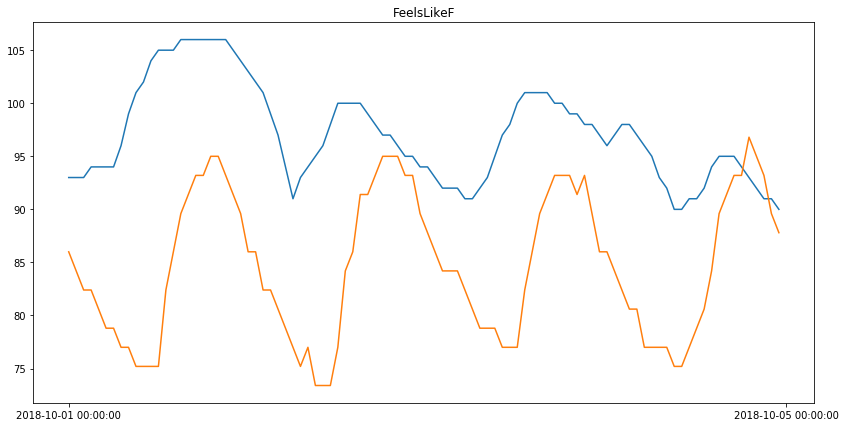

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib-2.2.2-py3.5-linux-x86_64.egg/matplotlib/pyplot.py'>

In [68]:
def k2f(val):
    # F = 9/5(K - 273.15) + 32
    return (9/5)*(val - 273.15) + 32

def c2f(val):
    return val * 1.8 + 32

def plot_field(field, compare=None, drange=None, plot=True):
    if drange is None: drange = (0, 10000000)
        
    plt.figure(figsize=(14, 7))
    plt.title(field)
    xs = [float(data[field]) for data in hourly][drange[0]:drange[1]]
    plt.plot(xs)
    plt.xticks([0, len(xs)], (inddate(drange[0]), inddate(drange[0] + len(xs))))
    if compare:   
        xs_targ = [compare(data) for data in paid_data][drange[0]:drange[1]]
        plt.plot(xs_targ)
    if plot:
        plt.show()
        plt.close()
    return plt
    

    
plot_field('FeelsLikeF', 
           compare=lambda data: k2f(float(data['main']['temp'])),
          drange=(dateind('2018-10-01'), dateind('2018-10-05')))

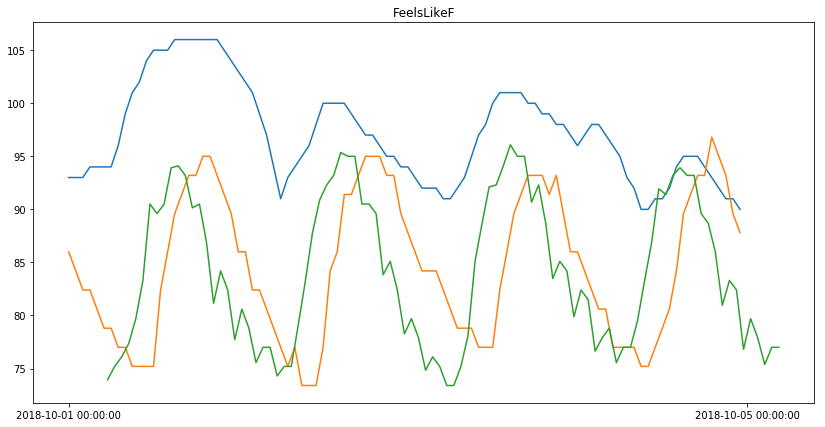

In [76]:
with open('data/wbio.json') as fl:
    wbio_data = json.load(fl)
    
import numpy as np
plt = plot_field('FeelsLikeF', 
           compare=lambda data: k2f(float(data['main']['temp'])),
          drange=(dateind('2018-10-01'), dateind('2018-10-05')), plot=False)
wbio_temps = [c2f(float(data['temp'])) for data in wbio_data]
wbio_shift5 = np.arange(len(wbio_temps)) + 5.5
plt.plot(wbio_shift5, wbio_temps)
plt.show()
plt.close()

# worldweatheronline
# openweathermap
# weatherbit.io


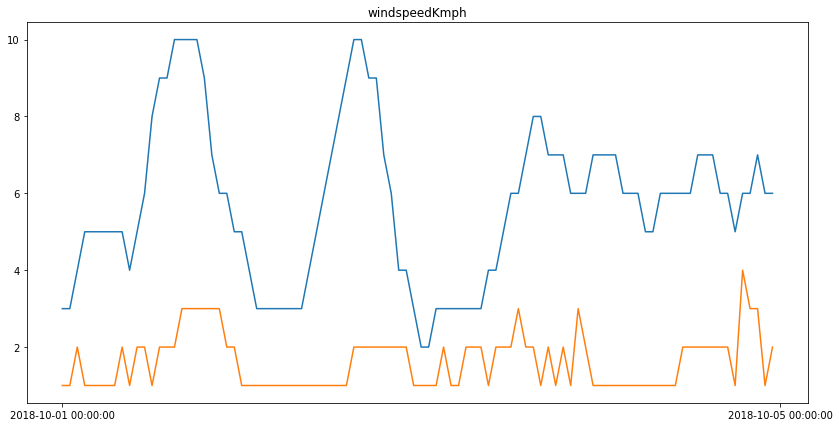

In [62]:
plot_field('windspeedKmph', compare=lambda data: float(data['wind']['speed']),
          drange=(dateind('2018-10-01'), dateind('2018-10-05')))

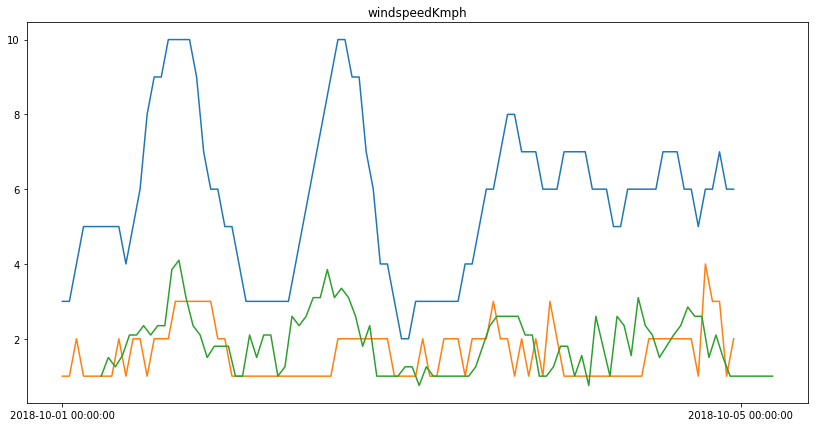

In [97]:
plt = plot_field('windspeedKmph', compare=lambda data: float(data['wind']['speed']),
          drange=(dateind('2018-10-01'), dateind('2018-10-05')), plot=False)

wbio_wspeed = [data['wind_spd'] for data in wbio_data]
for ind, sp in enumerate(wbio_wspeed):
    if sp is None: wbio_wspeed[ind] = wbio_wspeed[ind-1]
wbio_wspeed = [float(val) for val in wbio_wspeed]
wbio_shift5 = np.arange(len(wbio_wspeed)) + 5.5
plt.plot(wbio_shift5, wbio_wspeed)
plt.show()
plt.close()

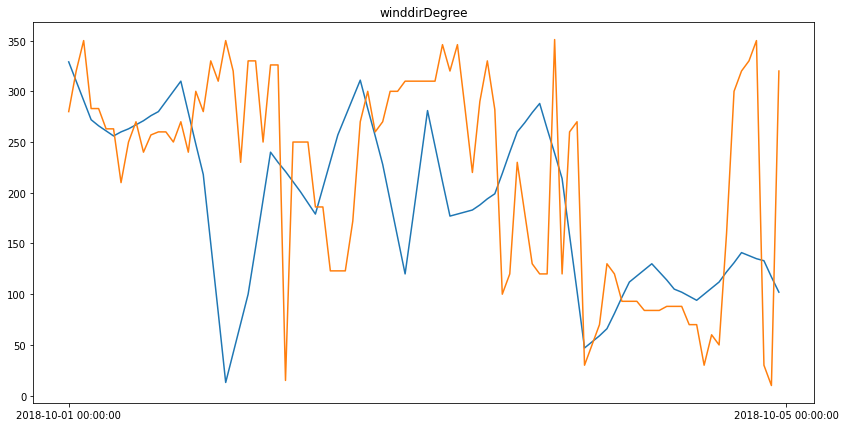

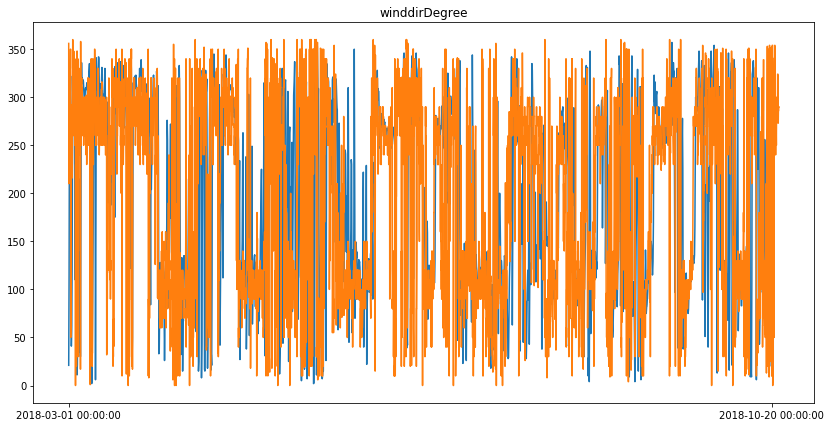

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib-2.2.2-py3.5-linux-x86_64.egg/matplotlib/pyplot.py'>

In [101]:
plot_field('winddirDegree', 
           compare=lambda data: float(data['wind']['deg']),
          drange=(dateind('2018-10-01'), dateind('2018-10-05')))
plot_field('winddirDegree', 
           compare=lambda data: float(data['wind']['deg']),
          drange=None)

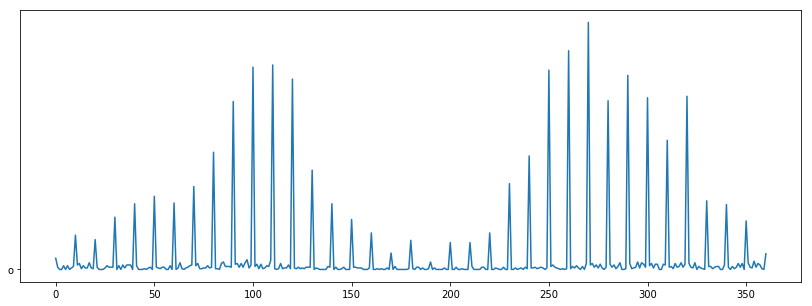

In [106]:
degbins = np.zeros(361)
for data in paid_data:
    dind = int(data['wind']['deg'])
    degbins[dind] += 1

plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(degbins)), degbins, 'C0', 'o')
plt.show()
plt.close()